In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import sqlite3
sqlite3.register_adapter(np.int64, int)
import re
import math
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

# 展開所有dataframe columns
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option ('display.max_colwidth',500)

# 不縮寫成科學記號
pd.set_option('display.float_format',lambda x : '%.2f' % x)

db = sqlite3.connect('./stock.db' , isolation_level=None)

In [2]:
df_daily = pd.read_sql_query("select * from daily order by date",db)
df_month = pd.read_sql_query(f"select * from monthlyRevenue order by date" , db)

[PE] : 範圍: 4.02 - 99.47 目前: 84.47 大量: 6.88


<BarContainer object of 138 artists>

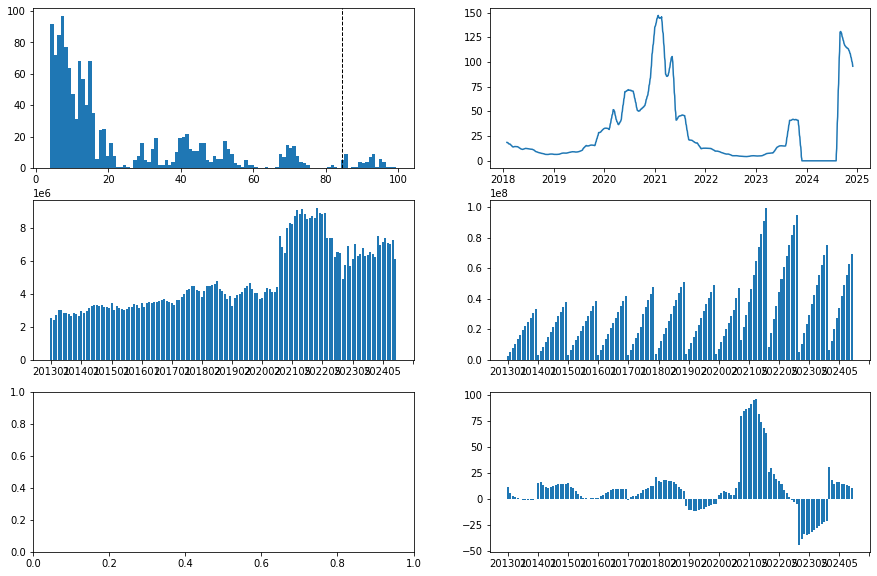

In [4]:
PE_MIN = 0
PE_MAX = 100

def peDistribution(id):
    pe = df_daily[df_daily['id']==id][['date','id','name','pe']]
    pe = pe[(pe['pe'] > PE_MIN) & (pe['pe'] < PE_MAX)]
    return pe['pe'].tolist()

ROW = 3
COL = 2
fig, ax = plt.subplots(ROW, COL, figsize=(15,10))

id = 2344

# 1.1 pe hist
pes = peDistribution(id)
y, x, _ = ax[0][0].hist(pes, 100)
df_id = df_daily[df_daily['id']==id]
name = df_id['name'].iloc[0]
now_pe = df_id.tail(1)['pe'].iloc[0]
most_pe = round(x[np.where(y == y.max())][0], 2)

print('[PE] :', '範圍:',f"{min(pes)} - {max(pes)}", '目前:', now_pe, '大量:', most_pe)

ax[0][0].axvline(now_pe, color='k', linestyle='dashed', linewidth=1)

# 1.2 pe line
pe = df_daily[df_daily['id']==id]
x = [datetime.strptime(str(d),'%Y%m%d').date() for d in pe['date']]
y = pe['pe'].rolling(20).mean()
ax[0][1].plot(x, y) 

# 2.1 月營收(單月)
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(12))
df = df_month[df_month['id']==id]
x = df['date'].tolist()
y = df['revenue'].tolist()
ax[1][0].bar(x, y)

# 2.2 月營收(累積)
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(12))
df = df_month[df_month['id']==id]
x = df['date'].tolist()
y = df['sum'].tolist()
ax[1][1].bar(x, y)

# 3.2 sumYoY
ax[2][1].xaxis.set_major_locator(ticker.MultipleLocator(12))
df = df_month[df_month['id']==id]
x = df['date'].tolist()
y = df['sumYoY'].tolist()
ax[2][1].bar(x, y)


In [ ]:
db.close()